# Business Problem

All the companies invest a lot of money on Digital Marketing these days on different channels like Email ADs, Google ADs, Instagram Feed, Youtube Ads, Facebook Feed etc.


Let's say Amazon as a company has invested 100 dollars on marketing on different channels like Google Ads(20 dollar ) Instagram feed(20 dollar), Facebook Feed(20 dollar) and on Youtube Ads(30 dollar) ,Now Amazon as a company wants to know,

<b>"HOW MUCH CONTRIBUTION EACH CHANNEL DID TO THE REVENUE OF THE COMPANY?"</b>

Now this question is very simple but the finding the solution to this could be very challenging because we need to understand that finally hit a customer to go for the product, what exactly works in the marketing campaign and more importantly why did not work out so that they can plan their Marketing Funds accordingly.


For example lets say from 80 percent of the sales from this marketing campaign comes from Youtube ADs, 10 percent comes from Google Search, 5 percent comes from Instagram, 5 percent from the Facebook.

Now if a company can get this detailed data about the percentage revenue from different channels then it will give more weightage of marketing budget to Youtube than other marketing channels.

This can literally help companies to understand the market in depth and will increase their revenue over time. 










# Approach-1 

<b>Rule Based/Intutive system </b>

1. These are some simple rule based systems which are more like gut-feeling driven.


2. Here we can say clicks are more Important than Impressions, Impressions are simply when you see an ad but you did not click it.


3. Search ads are more influential than Display ads, this is a simple intution that if a person searches something on the internet, then there are more chances that he/she will buy it. But when a person just sees a ad on any social media there are less chances for that conversion.


4. One simple rule is LAST INTERACTION ATTRIBUTION MODEL, for example, lets say i went to facebook, i saw an AD of Headphone, then i went to youtube, i saw the same ad , then i went to Google and i searched those Headphones and i clicked on the Google Ad then i finally purchased the Headphone, so according to LAST INTERACTION ATTRIBUTION MODEL,We will give 90% credit to the last channel(Google ADs) and rest small percentages to rest of the channels.


5. Another simple rule based system could be FIRST ATTRIBUTION CHANNEL, this means we are assuming that the first ad which user saw was responsible for the conversion, here 90% credit is given to the first channel and rest to other channels, This normally happens with luxurious items or Any New Product, lets say  A NEW MACBOOK where the channel could be the youtube presentation by APPLE.


6. Another could be a time decay model where we assume that with time the percentage credit to channels should Increase, for example lets say we showed the Smartphone ad to the user on Google Search AD, then we showed the ad to user on Instagram feed, then we showed the ad to the user on Facebook feed then we showed the ad on youtube. Now lets say user bought the smartphone, now according to the Time Decay model we will give maximum credits percentage of conversion to Youtube lets say 60%, then Facebook lets say 20%, then Instagram lets say 10%, then at last Google Ads lets say 5%.



# Approach-2

<b>Regression Based Machine Learning Models</b>

<b>Why not map this problem as a Machine Learning Problem???</b>

So lets say we have some old data which tells us about the revenue by different channels and the total sales for that campaign, now we can build a simple regression model where features will be the different channels and sales will be the target variable.

Regression will tell us how independent features(different channels) are mathematically related to dependent features (sales). 

y= x1*(Youtube) + x2*(Facebook) + x3*(Instagram) + x4*(GoogleAds) 

If I just find the values x1,x2,x3 and x4 then it will give me a good approximation of, how much Youtube is contibuting, how much Facebook is contributing, how much Instagram is contibuting and how much GoogleAds is contibuting.

Thats what we want,Right...


<b> Now before going to another approach which is a Marcov Chains, lets see some code of regression approach for Attribute Modelling </b>



# Data for  Regression Based Attribute Model

I have downloaded the data from kaggale, this seems a dummy data but not bad for understanding the regression approach.

Link for the data:- https://www.kaggle.com/datasets/sazid28/advertising.csv

Data has 3 features or channels , First is TV, Second is Radio, Third is Newspaper.
In this data we have revenue amount by different channels and then we have a total sales column.

For example- In first row, Total Sales is 22.1 lakhs, 2 lakh 30 thousand comes from TV, 37 thousand comes from Radio, 69 thousand comes from Newspaper, other amount can be assumed from direct sales.

# Performance Metric 

We have to use the Performance Metric for Regression.

1. RMSE(ROOT MEAN SQUARE ERROR)


2. R^2 (Coefficient of Determinant)


3. Adjusted R^2 

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

import warnings
warnings.filterwarnings("ignore")


In [3]:
#simply loading the data
data=pd.read_csv("Advertising.csv")



In [6]:
#printing the top 5 rows
data.head()

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [56]:
#getting the shape of the data
data.shape

(200, 5)

<b>Data we have is very small but not bad for the intution of how things are happening in regression, finding actual data from companies is very difficult because these are confidental datasets.</b>

In [4]:
#to see if there are null values in the data
data.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   radio       200 non-null    float64
 3   newspaper   200 non-null    float64
 4   sales       200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


THERE ARE NO NULL VALUES IN THE DATA

In [57]:
# to understand the data in depth
data.describe()



,Unnamed: 0,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,147.042500,23.264000,30.554000,14.022500
std,57.879185,85.854236,14.846809,21.778621,5.217457
min,1.000000,0.700000,0.000000,0.300000,1.600000
25%,50.750000,74.375000,9.975000,12.750000,10.375000
50%,100.500000,149.750000,22.900000,25.750000,12.900000
75%,150.250000,218.825000,36.525000,45.100000,17.400000
max,200.000000,296.400000,49.600000,114.000000,27.000000


In [4]:
#checking is there is any duplicate values in the data
data.duplicated().sum()

0

THERE ARE NO DUPLICATES ROWS IN THE DATA

In [17]:
#checking if any data point is null or not

data.isnull().sum()

Unnamed: 0    0
TV            0
radio         0
newspaper     0
sales         0
dtype: int64

In [6]:
#deleting unneccarry columns
data2=data.drop(['Unnamed: 0'],axis=1)


# EXPLORATORY DATA ANALYSIS



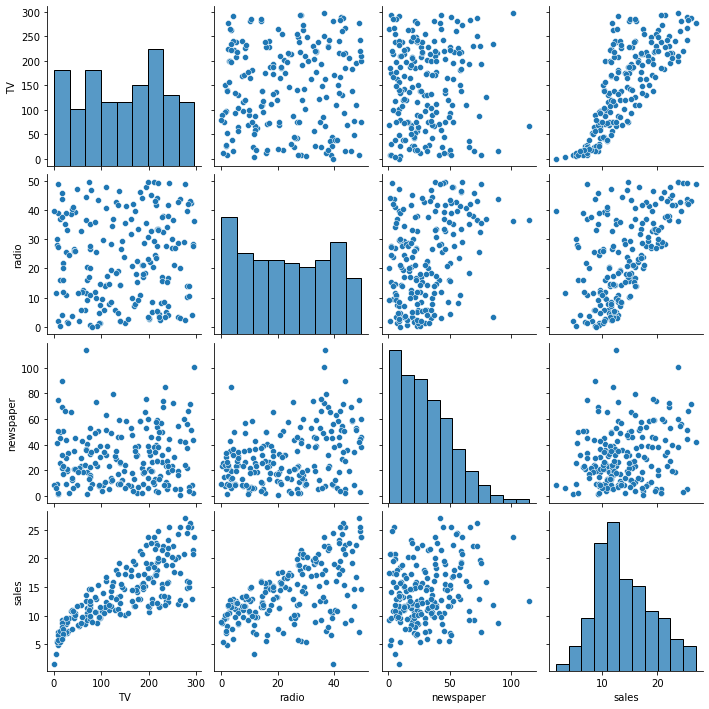

In [8]:
#pair plot
sns.pairplot(data2)

# Observation

1. Ideally we want no correlation between features or independent features and here we can see that  there is no correlation between TV and Radio, there is no correlation between TV and Newspaper, There is no correlation between Newspaper and Radio and thats a good sign.


2. We can also see that there is positive correlation between TV and Sales, Radio and Sales, Newspaper and Sales, this simply means all three of them is contributing in sales someway or the other.


3. We can see the histogram of radio is almost uniformly distributed, it means the revenue by radio has same frequencies in the the available ranges.


4. We can see the histogram of newspaper is power-law distributed, it means most of the revenue by newspaper is low compared to TV and Radio.


5. We can see the histogram of TV is approximately Left-Skewed, it means most of the revenue is towards the high side when compared to TV and Radio.

Text(0.5, 1.0, 'Correlation Heatmap')

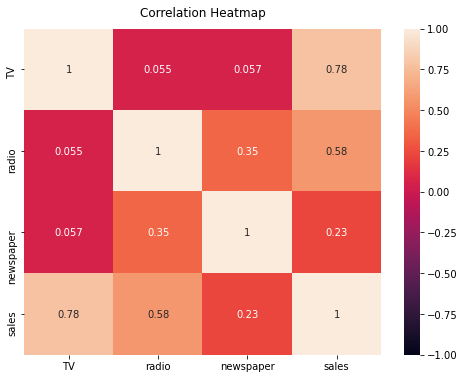

In [6]:
#lets find the correlation between feature
#HEATMAP
plt.figure(figsize=(8, 6))
heatmap = sns.heatmap(data2.corr(), vmin=-1, vmax=1, annot=True)
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12)


# Observation

1. There is a high correlation number between TV and Sales which is 0.78 means as we market our product on TV, our sales increases significantly


2. Then there is correlation between Radio and Sales which is 0.58 means Radio is also contibuting significantly to sales but not as much as TV.


3. Then we have also a positive correaltion between Sales and Newspaper but less compared to TV and Radio, it simply means giving advertisement to newspaper adds value in revenue but not as compared to TV and radio.


4. Other Correlation ratios are very small so we can ignore them.


In [7]:
#Just Dividing data into input(features) and output(target variable)
x2=data2.iloc[:,0:3]
y2=data2['sales']



# Modelling

So, lets start with train models with our data.

We gonna Train Linear regression without L2 regulaizer, Linear Regression with L2 regularizer,
Random Forest, GBDT


# 1. Random Forest Regressor

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

X_train, X_test, y_train, y_test = train_test_split(x2, y2, test_size = 0.3, random_state=50)

#hyperparameter tuning
param_grid = {
    'n_estimators': [200,300, 500],
    'max_depth' : [4,5,6]
} #hyperparameters
rfc=RandomForestRegressor(random_state=42)

grid_search = GridSearchCV(estimator = rfc, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2) #using grid search method to tune the hyperparameters

In [11]:
#here we are fiting the training data

grid_search.fit(X_train, y_train) #Fitting the data
print(grid_search.best_params_)

Fitting 3 folds for each of 9 candidates, totalling 27 fits
{'max_depth': 6, 'n_estimators': 500}


In [18]:
rfc_new=RandomForestRegressor(max_depth= 6, max_features= 'auto', n_estimators=500,random_state=42)
random_forest_model=rfc_new.fit(X_train,y_train)
y_pred=random_forest_model.predict(X_test) #predicting for test data

In [38]:
#PERFROMANCE OF THE RANDOM FOREST REGRESSOR
#MEAN_SQUARED_ERROR

print("The Mean Square error is ",mean_squared_error(y_test, y_pred))

#R^2
R2=r2_score(y_test,y_pred)
print("The R^2 Value is",R2)

#adjusted r^2 value
n=x2.shape[0] #number of rows
p=x2.shape[1] #numbr of features
Adj_r2 = 1-(1-R2)*(n-1)/(n-p-1)

print("The Adjusted R2 is",Adj_r2)


The Mean Square error is  0.3330227364583448
The R^2 Value is 0.9821040400901537
The Adjusted R2 is 0.9818301223364316


<AxesSubplot:>

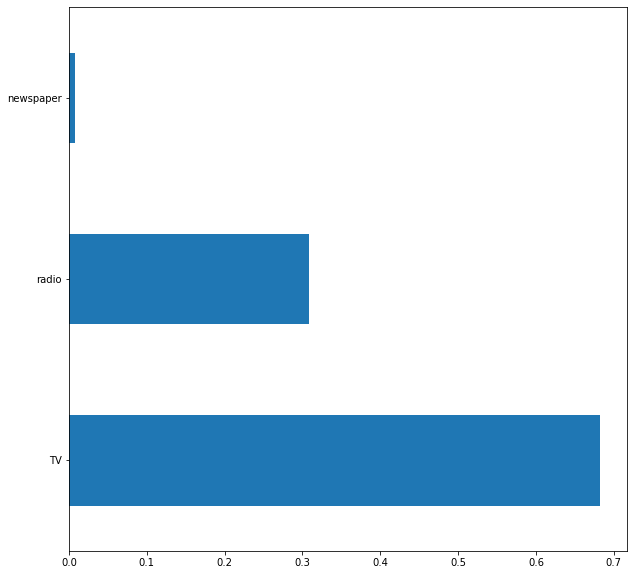

In [39]:
# Visualizing Feature Importance
feat_importances = pd.Series(random_forest_model.feature_importances_, index=x2.columns)
feat_importances.nlargest(25).plot(kind='barh',figsize=(10,10))

In [14]:

w1, w2, w3 = random_forest_model.feature_importances_
equation = "sales = ({} * TV) + ({} *  Radio) + ({} * Newspaper)".format(w1,w2,w3)
print(equation)



sales = (0.6828260179480447 * TV) + (0.30882519413197784 *  Radio) + (0.008348787919977457 * Newspaper)


Thats how the equation looks like...

In [16]:
# Defining Actual and Predicted values
y_pred = random_forest_model.predict(X_test)
labels = y_test
df_temp_rf = pd.DataFrame({'Actual': labels, 'Predicted':y_pred})
df_temp_rf=df_temp_rf.reset_index(drop=True)
df_temp_rf.head()

,Actual,Predicted
0,14.1,14.806383
1,11.9,11.924369
2,9.2,8.506623
3,11.0,11.196683
4,11.4,11.699815


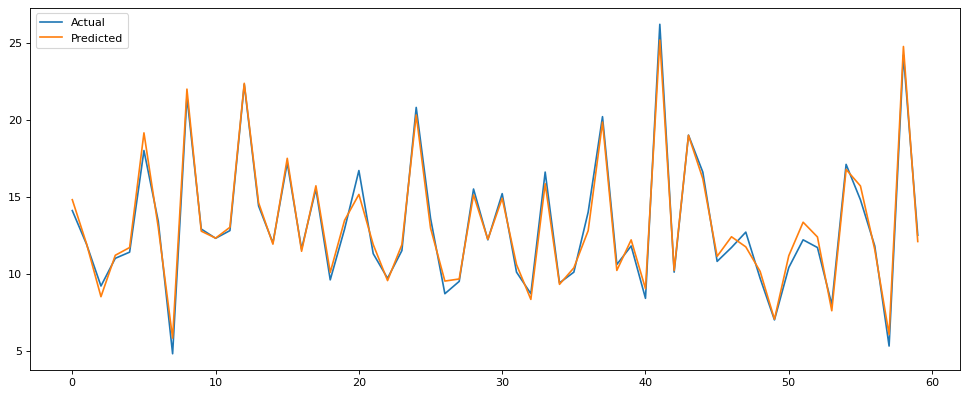

In [17]:
# Creating Line Graph
from matplotlib.pyplot import figure
figure(num=None, figsize=(15, 6), dpi=80, facecolor='w', edgecolor='k')
y1 = df_temp_rf['Actual']
y2 = df_temp_rf['Predicted']
plt.plot(y1, label = 'Actual')
plt.plot(y2, label = 'Predicted')
plt.legend()
plt.show()

# Observation

1. Now in the above line plot, the blue line tells us the the actual values of sales for the test data and orange line tells us the predicted values of sales for the same test data.

2. So more the overlapping of these two line charts, the better the model has predicted. In an ideal case, if a model is predicting perfectly then there should be complete overlap between these line charts.

# 2. Linear Regression Without Regularization


In [10]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge 

#without the regularization Term
linear=LinearRegression().fit(X_train,y_train)
print("The R2 value is",linear.score(X_test,y_test)) # this score gives the coefficient of determinant/R^2 SCORE of test data
y_pred_l=linear.predict(X_test)

The R2 value is 0.8590575550977457


Now we know that a good model is which gives R2 value closer to 1

In [57]:
#PERFROMANCE OF THE lINEAR REGRESSION 
#MEAN_SQUARED_ERROR

print("The Mean Square error is ",mean_squared_error(y_test, y_pred_l))

#R^2
R2_l=r2_score(y_test,y_pred_l)
print("The R^2 Value is",R2_l)

#adjusted r^2 value
n=x2.shape[0] #number of rows
p=x2.shape[1] #numbr of features
Adj_r2_l = 1-(1-R2_l)*(n-1)/(n-p-1)

print("The Adjusted R2 is",Adj_r2_l)




The Mean Square error is  2.622772900751401
The R^2 Value is 0.8590575550977457
The Adjusted R2 is 0.8569002727778132


<AxesSubplot:>

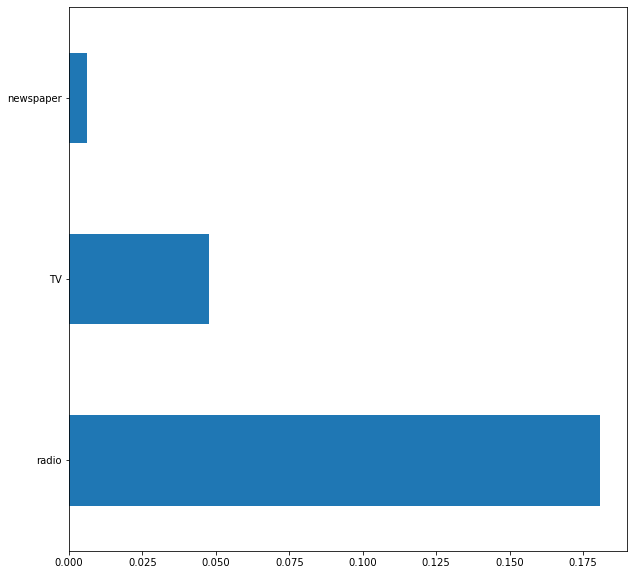

In [45]:
#feature importance with L2 REGULAIZER
# Visualizing Feature Importance
feat_importances = pd.Series(linear.coef_, index=x2.columns)
feat_importances.nlargest(25).plot(kind='barh',figsize=(10,10))

In [46]:
pd.DataFrame(linear.coef_, 
            x2.columns, 
            columns=['coef'])\
            .sort_values(by='coef', ascending=False)

,coef
radio,0.180880
TV,0.047550
newspaper,0.006298


In [47]:

w1, w2, w3 = linear.coef_
equation = "sales = ({} * TV) + ({} *  Radio) + ({} * Newspaper)".format(w1,w2,w3)
print(equation)

sales = (0.047550102703214345 * TV) + (0.18088015185280826 *  Radio) + (0.006298050600517718 * Newspaper)


In [49]:
# Defining Actual and Predicted values
y_pred = linear.predict(X_test)
labels = y_test
df_temp_linear = pd.DataFrame({'Actual': labels, 'Predicted':y_pred})
df_temp_linear=df_temp_linear.reset_index(drop=True)
df_temp_linear.head()

,Actual,Predicted
0,14.1,13.864713
1,11.9,15.009056
2,9.2,10.605117
3,11.0,10.090619
4,11.4,10.205830


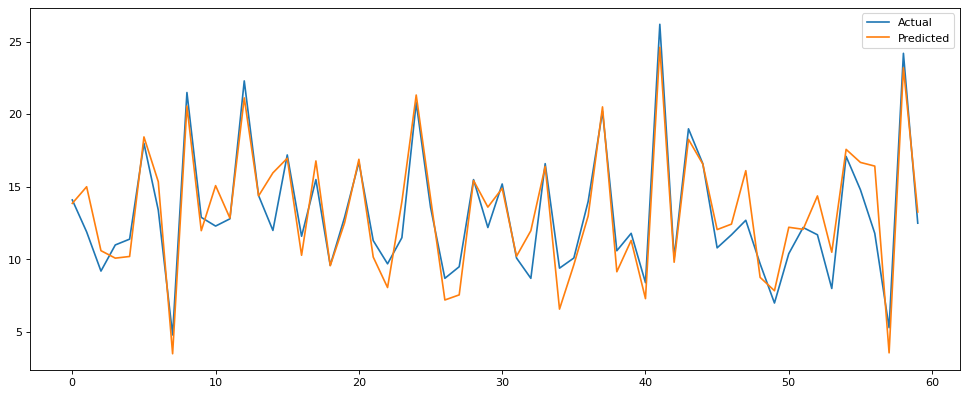

In [50]:
# Creating Line Graph
from matplotlib.pyplot import figure
figure(num=None, figsize=(15, 6), dpi=80, facecolor='w', edgecolor='k')
y1 = df_temp_linear['Actual']
y2 = df_temp_linear['Predicted']
plt.plot(y1, label = 'Actual')
plt.plot(y2, label = 'Predicted')
plt.legend()
plt.show()

# 3. Linear Regression with RIDGE(L2 REGULARIZER)

In [51]:
#ridge(L2 REGULARIZER)

tuned_parameters=[{'alpha':[10**-4,10**-2,10**0,10**2,10**4]}]

linear_L2_regulaizer=Ridge(random_state=43)


model=GridSearchCV(linear_L2_regulaizer,tuned_parameters)

model.fit(X_train,y_train)

print(model.best_estimator_)
print(model.score(X_test,y_test)) #return the R^2 

Ridge(alpha=100, random_state=43)
0.8586424742586294


In [54]:
ridge_model=Ridge(alpha=100, random_state=43)
ridge_model.fit(X_train,y_train)
y_pred_r=ridge_model.predict(X_test)

In [56]:
#PERFROMANCE OF THE lINEAR rEGRESSION REGRESSOR with l2 regularizer
#MEAN_SQUARED_ERROR

print("The Mean Square error is ",mean_squared_error(y_test, y_pred_r))

#R^2
R2_r=r2_score(y_test,y_pred_r)
print("The R^2 Value is",R2_r)

#adjusted r^2 value
n=x2.shape[0] #number of rows
p=x2.shape[1] #numbr of features
Adj_r2_r = 1-(1-R2_r)*(n-1)/(n-p-1)

print("The Adjusted R2 is",Adj_r2_r)

The Mean Square error is  2.6304970662943665
The R^2 Value is 0.8586424742586294
The Adjusted R2 is 0.8564788386605472


In [58]:
pd.DataFrame(ridge_model.coef_, 
            x2.columns, 
            columns=['coef'])\
            .sort_values(by='coef', ascending=False)

,coef
radio,0.180194
TV,0.047558
newspaper,0.006465


In [59]:
w1, w2, w3 = ridge_model.coef_
equation = "sales = ({} * TV) + ({} *  Radio) + ({} * Newspaper)".format(w1,w2,w3)
print(equation)

sales = (0.0475577623724944 * TV) + (0.1801944159143916 *  Radio) + (0.006464961489965146 * Newspaper)


<AxesSubplot:>

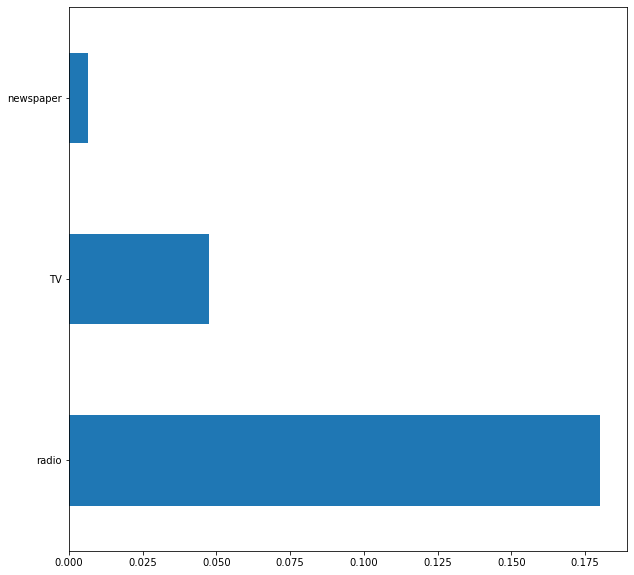

In [60]:
#feature importance with L2 REGULAIZER
# Visualizing Feature Importance
feat_importances = pd.Series(ridge_model.coef_, index=x2.columns)
feat_importances.nlargest(25).plot(kind='barh',figsize=(10,10))

In [61]:
# Defining Actual and Predicted values
y_pred = ridge_model.predict(X_test)
labels = y_test
df_temp = pd.DataFrame({'Actual': labels, 'Predicted':y_pred})
df_temp=df_temp.reset_index(drop=True)
df_temp.head()

,Actual,Predicted
0,14.1,13.866700
1,11.9,15.033476
2,9.2,10.603031
3,11.0,10.103727
4,11.4,10.213712


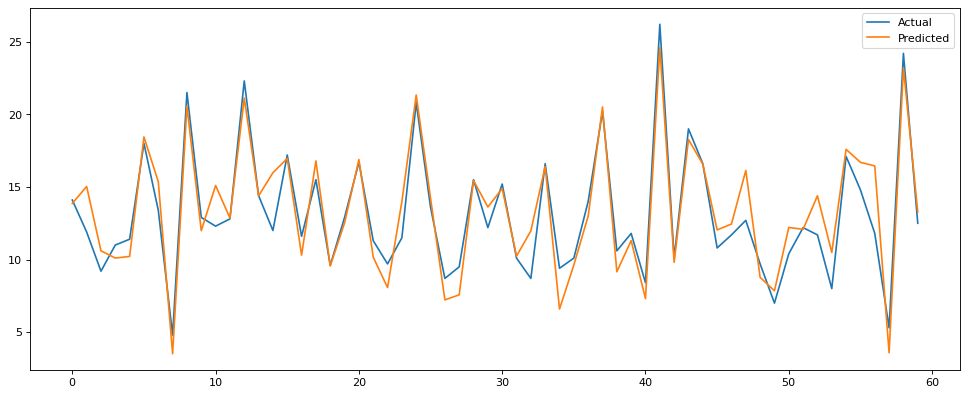

In [62]:

# Creating Line Graph
from matplotlib.pyplot import figure
figure(num=None, figsize=(15, 6), dpi=80, facecolor='w', edgecolor='k')
y1 = df_temp['Actual']
y2 = df_temp['Predicted']
plt.plot(y1, label = 'Actual')
plt.plot(y2, label = 'Predicted')
plt.legend()
plt.show()


# 4. GBDT(Gradient Boosting Decision Tree)

For GBDT, we will use XGBOOST LIBRARY

In [66]:
import xgboost as xg
xgb_r = xg.XGBRegressor(seed = 123)


param_grid = {
    'n_estimators': [200,300, 500],
    'max_depth' : [4,5,6]
}
model_gbdt=GridSearchCV(xgb_r,param_grid)

model_gbdt.fit(X_train,y_train)

print(model_gbdt.best_estimator_)
print("The R^2 score is",model_gbdt.score(X_test,y_test)) #return the R^2 

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=4,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=200, n_jobs=8, num_parallel_tree=1, random_state=123,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=123,
             subsample=1, tree_method='exact', validate_parameters=1,
             verbosity=None)
The R^2 score is 0.973842045517139


In [67]:
gbdt_xg= xg.XGBRegressor(n_estimators=200,max_depth=4,seed = 123)
gbdt_xg.fit(X_train,y_train)
y_pred_xg=gbdt_xg.predict(X_test)

In [68]:
#PERFROMANCE OF THE GBDT regressor
#MEAN_SQUARED_ERROR

print("The Mean Square error is ",mean_squared_error(y_test, y_pred_xg))

#R^2
R2_xg=r2_score(y_test,y_pred_xg)
print("The R^2 Value is",R2_xg)

#adjusted r^2 value
n=x2.shape[0] #number of rows
p=x2.shape[1] #numbr of features
Adj_r2_xg = 1-(1-R2_xg)*(n-1)/(n-p-1)

print("The Adjusted R2 is",Adj_r2_xg)

The Mean Square error is  0.48676872466854065
The R^2 Value is 0.973842045517139
The Adjusted R2 is 0.9734416686628096


In [69]:
f_importance=gbdt_xg.feature_importances_

In [70]:
w1, w2, w3 = gbdt_xg.feature_importances_
equation = "sales = ({} * TV) + ({} *  Radio) + ({} * Newspaper)".format(w1,w2,w3)
print(equation)

sales = (0.7091736793518066 * TV) + (0.28797149658203125 *  Radio) + (0.002854815451428294 * Newspaper)


In [71]:
pd.DataFrame(f_importance, 
            x2.columns)

,0
TV,0.709174
radio,0.287971
newspaper,0.002855


<AxesSubplot:>

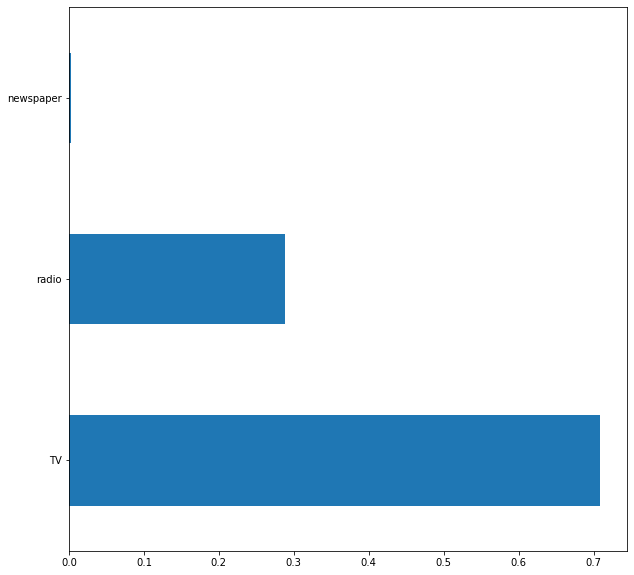

In [72]:
#feature importance plot for GBDT
# Visualizing Feature Importance
feat_importances = pd.Series(f_importance, index=x2.columns)
feat_importances.nlargest(25).plot(kind='barh',figsize=(10,10))

In [73]:
y_pred = gbdt_xg.predict(X_test)
labels = y_test
df_temp = pd.DataFrame({'Actual': labels, 'Predicted':y_pred})
df_temp=df_temp.reset_index(drop=True)
df_temp.head()

,Actual,Predicted
0,14.1,14.380721
1,11.9,11.871456
2,9.2,7.987011
3,11.0,11.039511
4,11.4,11.939294


<AxesSubplot:ylabel='Actual'>

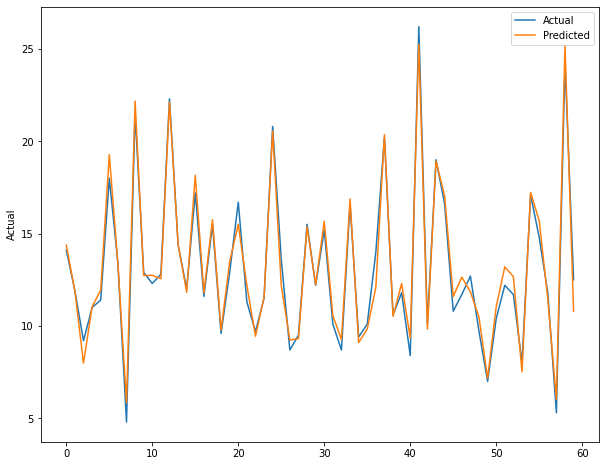

In [74]:
#sns.lineplot(data=df_temp,x="Actual",y="Predicted")
y1 = df_temp['Actual']
y2 = df_temp['Predicted']
plt.figure(figsize=(10,8))

sns.lineplot(data=y1,label="Actual")
sns.lineplot(data=y2,label="Predicted")


# Conclusion

In [12]:
from prettytable import PrettyTable
columns=(["ALGORITHM", "MEAN_SQUARE_ERROR","R2 VALUE","ADJUSTED R2 VALUE"])
myTable = PrettyTable()
myTable.add_column(columns[0], ["Random Forest","Linear regression","Linear Regression with L2 Regularizer", "GBDT" ])
myTable.add_column(columns[1], ["0.333"," 2.62","2.63","0.486"])
myTable.add_column(columns[2], ["0.982","0.859","0.858","0.9738"])
myTable.add_column(columns[3],["0.981","0.856","0.856","0.973"])

print(myTable)



+---------------------------------------+-------------------+----------+-------------------+
|               ALGORITHM               | MEAN_SQUARE_ERROR | R2 VALUE | ADJUSTED R2 VALUE |
+---------------------------------------+-------------------+----------+-------------------+
|             Random Forest             |       0.333       |  0.982   |       0.981       |
|           Linear regression           |        2.62       |  0.859   |       0.856       |
| Linear Regression with L2 Regularizer |        2.63       |  0.858   |       0.856       |
|                  GBDT                 |       0.486       |  0.9738  |       0.973       |
+---------------------------------------+-------------------+----------+-------------------+


1. So out of all four algorithms, Random Forest has the least mean square error which is 0.33, we want mean sqaure error to be minimum.


2. Out of all four algorithms, Random forest has the maximum R2 value which is 0.982.


3. Out of all four algorithms, Random forest has the maximum R2 value which is 0.981.


4. Also Random Forest is giving us the very good Feature Importance scores


<b>sales = (0.6828260179480447 * TV) + (0.30882519413197784 *  Radio) + (0.008348787919977457 * Newspaper)

It can be simply interpretated that 68.2% of the sales coming from the TV marketing, 30% of the sales coming from the Radio Marketing and only 0.8% sales coming from the Newspaper marketing </b>

So the best algorithm in this case study will be RANDOM FOREST.

# Approach-3 (Markov-Chain Model)

Our aim is very simple, we want to understand that what marketing channel contribute to sales and in what proportion.

We will see, how MARKOV CHAIN MODEL can help us to solve this problem.

Before going to Markov Chain Model, lets understand the data for this case study.

# Data 

Here we have a interesting data, we have a data in which a ad have been showed to people through different channels
like instagram,online display, paid search, youtube video, facebook.

Lets discuss Features...

<b>Feature-1--> Cookie</b>

To identify every user, we have a cookie and respective channel on which the ad has been shown.

<b>Feature-2--> Time</b>

This is just the time when a particular ad was shown to a user.

<b>Feature-3--> Interaction</b>

For every ad shown to every user, We have a interaction features which tells us whether that ad was just a impression or that ad converted to a impression.

<b>Feature-4--> Conversion</b>

This feature tells us whther there was a coversion or not.

<b>Feature-5--> Channel</b>

To single user, we are showing ads to multiple channels through a path,channel could be Instagram, Facebook or Youtube Video

For example, 

There could be a chance that a user has seen a ad on instagram first, then on facebook and then on youtube and finally he purchased that item, so understanding that path and understanding what channel causes that conversion is very important.



# Markov Chain Approach

Let's formulate our problem in a way that Marcov chains can help us to solve the problem

Here we have some states, lets discuss them one by one...

<b>    
    
    
S0- It is the starting state, where we are assuming customer had not seen an ad yet
    

SF- It is a state where we have shown the ad to the user through FACEBOOK Ads
    

SF- It is a state where we have shown the ad to the user through GOOGLE Ads
    

SNP-It is a state where customer has not purchased an item, so this is NO-CONVERSION State.
    

SP- It is a state where customer has purchased an item, so this is a CONVERSION State.

</b>


From the above diagram, we can see that without showing any ad, there is 40% sale value, this is called the direct sale, so we can say that,


P(SP/S0)=0.4 

<b>(It means the probability that customer will directly go to purchase state given that he was at 0th state or starting state is 0.4)</b>

These weights are conditional probabilities.

P(SNP/S0)=0.1

<b>(It means the probability that customer will directly will not purchase is 0.1)</b>


P(SF/S0)=0.1

<b>(It means there is a 10% probability that we show a FB ad to a user)</b>


P(SP/SF)=0.1

<b>(It means the probability of a customer that he will purchase given that he has seen the FB ad is 0.1)</b>

# Now the question is, How do we fill these probabilities??

We do it from data, lets say we have 10k customers at S0 state, now we decide to show some of them FB ads, some of them Google ads, then see how many of them converted and how many did not get converted, we will fil these probabilities emperically/through observation.

These are simple conditional probabilities, by observation we found that 4k people end up purchasing without showing any ad, it means what is the probability that customer will go to purchase state given that he/she is on initial stage, it is simply 4k/10k which is 0.4.


Also there is a temporal angle to it that if customer comes to website and does not purchase in 7 days, I will say customer has not purchased.



# MemoryLess Property of Markov Chains

Now markov chain has this MemoryLess property, lets discuss that in detail...

<b>P(Sj/Sj-1,Sj-2.....S0)=P(Sj/Sj-1)</b>

Here this equation simply says that, Probabilty of going to STATE Sj only depends on the previous state,it does not care about history of other states, as it is shown above in the formula, Probability of going Sj will only depend on the Sj-1 and not on earlier states or path.

Now the question is,  <b>DOES MemoryLess Property actually hold in our marketing problem?</b>

Memeoryless property states that probability of reaching to the current state just depends upon the previous state and not the path previous to that, for example

Lets say a user was shown a Facebood ad first, then a Google ad, Now we want to know the probabilty that he will purchase the product, so according to markov memory less property, probability of coversion depends upon the previous state which is a Google ad in this case so HERE IN THIS CASE 

<b>P(CONVERSION/GOOGLE_AD, FACEBOOK_AD)=P(CONVERSION/GOOGLE_AD)=0.3(given in the diagram)</b>

Marcov memory less property/assumption makes our life very simple as it neglects the path but if we think logically probability of conversion here just do not depends on Google_ad, it also depends upon Facebook_ad but here we are neglecting that.

Now when we have this property, we can come with the overall P(CONVERSION), which is

P(SP)=(0.4)+(0.1*0.1)+(0.1*0.1*0.3)+(0.4*0.3)=0.533

SP here is simply the purchase state.

Again this multiplication we can only do when we are assuming that probability of reaching SP only depends on the previous state.

# Now coming to Attribution Modelling Problem

We have started with the very basic problem, we wanted to understand the contribution of each and every marketing channel in the sales so that we can improve the system.

We wanted to understand the impact of a particular channel, lets say i want to understand the how important Google ads are in above example,
Lets Just remove Google from the markov diagram and then see how will it change the conversion probabilty.

P(SP)=(0.4)+(0.1*0.1)=0.41

P(SP) WHEN GOOGLE ADS WAS THERE =0.533

P(SP) WHEN NO GOOGLE ADS= 0.41

EFFECT OF REMOVAL= 1-(0.41/0.533)=0.23

Lets say earlier i have 1000 conversions, now after removing google conversion will be 1000*(0.41/0.533)=773.5, Now i will have 773 conversion.

<b>  23.07% Percentage of sales would be lost if we do not use Google Ads
   
</b>

# Drawbacks of Marcov Chains

The major issue with markov chains is its Memoryless Assumption, if we do not use this assumption them time complexity would be exponential.


# How will we compute Edge Weight/Probabilities?

Lets understand this by a simple example, imagine a company wants to spend $100k dollars on a marketing campaign, tall the money spent on different channels for next 30 days, after the campaign ended in 30 days , company waited for more 7 days for conversion, In this whole time, few people will go for direct sales, few will go after Google Ads, Few will go after Facebok Ad and so on. 

Based on this data, we will emperically add probabilies and find the conditional probabilites or edge weight.

In [4]:
# importing libraries
import pandas as pd

df=pd.read_csv("attribution data.csv")
df.head()

,cookie,time,interaction,conversion,conversion_value,channel
0,00000FkCnDfDDf0iC97iC703B,2018-07-03T13:02:11Z,impression,0,0.0,Instagram
1,00000FkCnDfDDf0iC97iC703B,2018-07-17T19:15:07Z,impression,0,0.0,Online Display
2,00000FkCnDfDDf0iC97iC703B,2018-07-24T15:51:46Z,impression,0,0.0,Online Display
3,00000FkCnDfDDf0iC97iC703B,2018-07-29T07:44:51Z,impression,0,0.0,Online Display
4,0000nACkD9nFkBBDECD3ki00E,2018-07-03T09:44:57Z,impression,0,0.0,Paid Search


In [5]:
#interaction has 2 categories, one is Impression , second is Conversion
df['interaction'].value_counts()


impression    569098
conversion     17639
Name: interaction, dtype: int64

In [3]:
df.shape


(586737, 6)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 586737 entries, 0 to 586736
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   cookie            586737 non-null  object 
 1   time              586737 non-null  object 
 2   interaction       586737 non-null  object 
 3   conversion        586737 non-null  int64  
 4   conversion_value  586737 non-null  float64
 5   channel           586737 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 26.9+ MB


In [78]:
df.describe()

,conversion,conversion_value
count,586737.000000,586737.000000
mean,0.030063,0.187871
std,0.170760,1.084498
min,0.000000,0.000000
25%,0.000000,0.000000
50%,0.000000,0.000000
75%,0.000000,0.000000
max,1.000000,8.500000


In [129]:
df.isnull().sum()
#there are no null values in the data

cookie              0
time                0
interaction         0
conversion          0
conversion_value    0
channel             0
dtype: int64

In [6]:
df.duplicated().sum()
#so there are 4145 duplicates in the data, we have to remove these duplicate values

4145

In [7]:
df2=df.drop_duplicates()
#lets remove the duplicated

In [8]:
df2.shape
#after removing duplicates we got 582592 rows

(582592, 6)

In [9]:
df2.duplicated().sum()
#no duplicates in the data now

0

In [10]:
print(len(df2['cookie'].unique()))
#so we can say in this data we have 2 lakh 40 thousand and 108 unique people

240108


<b>The data set contains 582592 marketing touch-points for 240108 unique customers which resulted in 18,000 thousand conversion events.</b>


In [11]:
df2['interaction'].value_counts()

impression    564953
conversion     17639
Name: interaction, dtype: int64

In [114]:
df2['channel'].value_counts()

Facebook          175068
Paid Search       150666
Online Video      110879
Instagram          75096
Online Display     70883
Name: channel, dtype: int64

In [115]:
df2['conversion'].value_counts()

0    564953
1     17639
Name: conversion, dtype: int64

In [12]:
df2 = df2.sort_values(['cookie', 'time'],
                    ascending=[False, True])
df2

,cookie,time,interaction,conversion,conversion_value,channel
586736,ooooohAFofEnonEikhAi3fF9o,2018-07-14T17:17:12Z,impression,0,0.0,Paid Search
586734,ooooiBh70D3k3BfAhDFfii9h7,2018-07-03T12:57:25Z,impression,0,0.0,Paid Search
586735,ooooiBh70D3k3BfAhDFfii9h7,2018-07-19T08:17:59Z,impression,0,0.0,Online Video
586731,ooooEiB0CCoEf9fiiC90Dfhfk,2018-07-06T23:30:38Z,impression,0,0.0,Online Display
586732,ooooEiB0CCoEf9fiiC90Dfhfk,2018-07-12T23:50:45Z,impression,0,0.0,Online Display
...,...,...,...,...,...,...
9,0000nACkD9nFkBBDECD3ki00E,2018-07-11T22:19:53Z,impression,0,0.0,Paid Search
0,00000FkCnDfDDf0iC97iC703B,2018-07-03T13:02:11Z,impression,0,0.0,Instagram
1,00000FkCnDfDDf0iC97iC703B,2018-07-17T19:15:07Z,impression,0,0.0,Online Display
2,00000FkCnDfDDf0iC97iC703B,2018-07-24T15:51:46Z,impression,0,0.0,Online Display


In [13]:
df2['visit_order'] = df2.groupby('cookie').cumcount() + 1



In [134]:
df2

,cookie,time,interaction,conversion,conversion_value,channel,visit_order
586736,ooooohAFofEnonEikhAi3fF9o,2018-07-14T17:17:12Z,impression,0,0.0,Paid Search,1
586734,ooooiBh70D3k3BfAhDFfii9h7,2018-07-03T12:57:25Z,impression,0,0.0,Paid Search,1
586735,ooooiBh70D3k3BfAhDFfii9h7,2018-07-19T08:17:59Z,impression,0,0.0,Online Video,2
586731,ooooEiB0CCoEf9fiiC90Dfhfk,2018-07-06T23:30:38Z,impression,0,0.0,Online Display,1
586732,ooooEiB0CCoEf9fiiC90Dfhfk,2018-07-12T23:50:45Z,impression,0,0.0,Online Display,2
...,...,...,...,...,...,...,...
9,0000nACkD9nFkBBDECD3ki00E,2018-07-11T22:19:53Z,impression,0,0.0,Paid Search,6
0,00000FkCnDfDDf0iC97iC703B,2018-07-03T13:02:11Z,impression,0,0.0,Instagram,1
1,00000FkCnDfDDf0iC97iC703B,2018-07-17T19:15:07Z,impression,0,0.0,Online Display,2
2,00000FkCnDfDDf0iC97iC703B,2018-07-24T15:51:46Z,impression,0,0.0,Online Display,3


In [14]:
df_paths = df2.groupby('cookie')['channel'].aggregate(
    lambda x: x.unique().tolist()).reset_index()

In [15]:
df_paths

,cookie,channel
0,00000FkCnDfDDf0iC97iC703B,"[Instagram, Online Display]"
1,0000nACkD9nFkBBDECD3ki00E,[Paid Search]
2,0003EfE37E93D0BC03iBhBBhF,[Paid Search]
3,00073CFE3FoFCn70fBhB3kfon,[Instagram]
4,00079hhBkDF3k3kDkiFi9EFAD,[Paid Search]
...,...,...
240103,ooooE0hkAFBkED90ChDDiBFAf,[Online Display]
240104,ooooEBE0o0D97ACAAAnDoi3F0,[Online Display]
240105,ooooEiB0CCoEf9fiiC90Dfhfk,[Online Display]
240106,ooooiBh70D3k3BfAhDFfii9h7,"[Paid Search, Online Video]"


In [16]:
import numpy as np
df_last_interaction = df.drop_duplicates('cookie', keep='last')[['cookie', 'conversion']]
df_paths= pd.merge(df_paths, df_last_interaction, how='left', on='cookie')



In [17]:
df_paths['path'] = np.where(
 df_paths['conversion'] == 0,
 ['Start, '] + df_paths['channel'].apply(', '.join) + [', Null'],
 ['Start, '] + df_paths['channel'].apply(', '.join) + [', conversion'])

df_paths['path'] = df_paths['path'].str.split(', ')




In [18]:
df_paths

,cookie,channel,conversion,path
0,00000FkCnDfDDf0iC97iC703B,"[Instagram, Online Display]",0,"[Start, Instagram, Online Display, Null]"
1,0000nACkD9nFkBBDECD3ki00E,[Paid Search],0,"[Start, Paid Search, Null]"
2,0003EfE37E93D0BC03iBhBBhF,[Paid Search],0,"[Start, Paid Search, Null]"
3,00073CFE3FoFCn70fBhB3kfon,[Instagram],0,"[Start, Instagram, Null]"
4,00079hhBkDF3k3kDkiFi9EFAD,[Paid Search],0,"[Start, Paid Search, Null]"
...,...,...,...,...
240103,ooooE0hkAFBkED90ChDDiBFAf,[Online Display],0,"[Start, Online Display, Null]"
240104,ooooEBE0o0D97ACAAAnDoi3F0,[Online Display],0,"[Start, Online Display, Null]"
240105,ooooEiB0CCoEf9fiiC90Dfhfk,[Online Display],0,"[Start, Online Display, Null]"
240106,ooooiBh70D3k3BfAhDFfii9h7,"[Paid Search, Online Video]",0,"[Start, Paid Search, Online Video, Null]"


In [19]:

list_of_paths = df_paths['path']
print(len(list_of_paths))
total_conversions = sum(i.count('conversion') for i in df_paths['path'].tolist())
print(total_conversions)
base_conversion_rate = total_conversions / len(list_of_paths)
print(base_conversion_rate)

240108
17639
0.07346277508454528


In [20]:

def transition_states_2(list_of_paths):
    list_of_unique_channels=set()
    for i in list2:
        for j in i:
            list_of_unique_channels.add(j)
            
    transition_states=dict()
    for x in list_of_unique_channels:
        for y in list_of_unique_channels:
            transition_states[x + '>' + y]=0
    
    indices=[]
    for possible_state in list_of_unique_channels:
        if possible_state not in ['conversion', 'Null']:
            for user_path in list2:
                if possible_state in user_path:
                    for i, s in enumerate(user_path):
                        if possible_state in s:
                            indices.append(i)
                for col in indices:
                    transition_states[user_path[col] + '>' + user_path[col-1]] += 1
    
    return transition_states



                    




                    
   
            
list2=list_of_paths.iloc[0:10]        
#list_of_unique_channels=set()

#print(list2)
#a=set(x for element in list2 for x in element)
#print(a)
transition_states_2(list2)


{'Null>Null': 0,
 'Null>Online Video': 4,
 'Null>Instagram': 3,
 'Null>conversion': 0,
 'Null>Paid Search': 9,
 'Null>Facebook': 4,
 'Null>Start': 0,
 'Null>Online Display': 0,
 'Online Video>Null': 0,
 'Online Video>Online Video': 0,
 'Online Video>Instagram': 0,
 'Online Video>conversion': 0,
 'Online Video>Paid Search': 0,
 'Online Video>Facebook': 0,
 'Online Video>Start': 43,
 'Online Video>Online Display': 0,
 'Instagram>Null': 0,
 'Instagram>Online Video': 0,
 'Instagram>Instagram': 0,
 'Instagram>conversion': 0,
 'Instagram>Paid Search': 0,
 'Instagram>Facebook': 0,
 'Instagram>Start': 110,
 'Instagram>Online Display': 0,
 'conversion>Null': 0,
 'conversion>Online Video': 0,
 'conversion>Instagram': 0,
 'conversion>conversion': 0,
 'conversion>Paid Search': 4,
 'conversion>Facebook': 4,
 'conversion>Start': 0,
 'conversion>Online Display': 0,
 'Paid Search>Null': 0,
 'Paid Search>Online Video': 0,
 'Paid Search>Instagram': 0,
 'Paid Search>conversion': 0,
 'Paid Search>Paid Sea

In [21]:
def transition_states(list_of_paths):
    list_of_unique_channels = set(x for element in list_of_paths for x in element)
    transition_states = {x + '>' + y: 0 for x in list_of_unique_channels for y in list_of_unique_channels}

    for possible_state in list_of_unique_channels:
        if possible_state not in ['conversion', 'Null']:
            for user_path in list_of_paths:
                if possible_state in user_path:
                    indices = [i for i, s in enumerate(user_path) if possible_state in s]
                    for col in indices:
                        transition_states[user_path[col] + '>' + user_path[col-1]] += 1

    return transition_states


trans_states = transition_states(list_of_paths)



In [22]:
def transition_prob(trans_dict):
    list_of_unique_channels = set(x for element in list_of_paths for x in element)
    trans_prob = dict()
    for state in list_of_unique_channels:
        if state not in ['Conversion', 'Null']:
            counter = 0
            index = [i for i, s in enumerate(trans_dict) if state + '>' in s]
            for col in index:
                if trans_dict[list(trans_dict)[col]] > 0:
                    counter += trans_dict[list(trans_dict)[col]]
            for col in index:
                if trans_dict[list(trans_dict)[col]] > 0:
                    state_prob = float((trans_dict[list(trans_dict)[col]])) / float(counter)
                    trans_prob[list(trans_dict)[col]] = state_prob

    return trans_prob


trans_prob = transition_prob(trans_states)

trans_prob

{'Online Video>Instagram': 0.029124554465114007,
 'Online Video>Paid Search': 0.06337581172794297,
 'Online Video>Facebook': 0.05502661002880719,
 'Online Video>Start': 0.8344807382452029,
 'Online Video>Online Display': 0.017992285532932962,
 'Instagram>Online Video': 0.026422188978288116,
 'Instagram>Paid Search': 0.061415922047466945,
 'Instagram>Facebook': 0.30833299640156875,
 'Instagram>Start': 0.5785387943233736,
 'Instagram>Online Display': 0.02529009824930255,
 'Paid Search>Online Video': 0.022107158937415577,
 'Paid Search>Instagram': 0.0255065285907249,
 'Paid Search>Facebook': 0.05024763619990995,
 'Paid Search>Start': 0.8578343088698784,
 'Paid Search>Online Display': 0.04430436740207114,
 'Facebook>Online Video': 0.02757446808510638,
 'Facebook>Instagram': 0.12280283687943262,
 'Facebook>Paid Search': 0.0649645390070922,
 'Facebook>Start': 0.7585588652482269,
 'Facebook>Online Display': 0.026099290780141844,
 'Start>Null': 0.9265372249154548,
 'Start>conversion': 0.073462

In [32]:
def transition_matrix(list_of_paths, transition_probabilities):
    trans_matrix = pd.DataFrame()
    list_of_unique_channels = set(x for element in list_of_paths for x in element)

    for channel in list_of_unique_channels:
        trans_matrix[channel] = 0.00
        trans_matrix.loc[channel] = 0.00
        trans_matrix.loc[channel][channel] = 1.0 if channel in ['Conversion', 'Null'] else 0.0

    for key, value in transition_probabilities.items():
        origin, destination = key.split('>')
        trans_matrix.at[origin, destination] = value

    return trans_matrix


trans_matrix = transition_matrix(list_of_paths, trans_prob)

trans_matrix

,Null,Online Video,Instagram,conversion,Paid Search,Facebook,Start,Online Display
Null,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Online Video,0.000000,0.000000,0.029125,0.000000,0.063376,0.055027,0.834481,0.017992
Instagram,0.000000,0.026422,0.000000,0.000000,0.061416,0.308333,0.578539,0.025290
conversion,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Paid Search,0.000000,0.022107,0.025507,0.000000,0.000000,0.050248,0.857834,0.044304
Facebook,0.000000,0.027574,0.122803,0.000000,0.064965,0.000000,0.758559,0.026099
Start,0.926537,0.000000,0.000000,0.073463,0.000000,0.000000,0.000000,0.000000
Online Display,0.000000,0.018191,0.027321,0.000000,0.100202,0.050371,0.803915,0.000000


<AxesSubplot:>

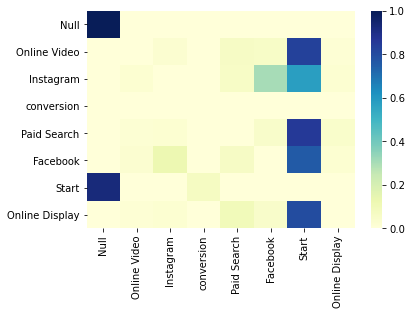

In [24]:
import seaborn as sns
sns.heatmap(trans_matrix,cmap="YlGnBu")

In [58]:
removal_effects_dict = {}
channels = [channel for channel in trans_matrix.columns if channel not in ['Start',
                                                                     'Null',
                                                                     'conversion']]
print(channels)

for channel in channels:
    removal_df = trans_matrix.drop(channel, axis=1).drop(channel, axis=0)
    for column in removal_df.columns:
        row_sum = np.sum(list(removal_df.loc[column]))
        null_pct = float(1) - row_sum
        if null_pct != 0:
                removal_df.loc[column]['Null'] = null_pct
        removal_df.loc['Null']['Null'] = 1.0

    removal_to_conv = removal_df[
            ['Null', 'conversion']].drop(['Null', 'conversion'], axis=0)
    removal_to_non_conv = removal_df.drop(
            ['Null', 'conversion'], axis=1).drop(['Null', 'conversion'], axis=0)



['Online Video', 'Instagram', 'Paid Search', 'Facebook', 'Online Display']


,Null,Online Video,Instagram,conversion,Paid Search,Facebook,Start
Null,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Online Video,0.017992,0.000000,0.029125,0.000000,0.063376,0.055027,0.834481
Instagram,0.025290,0.026422,0.000000,0.000000,0.061416,0.308333,0.578539
conversion,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Paid Search,0.044304,0.022107,0.025507,0.000000,0.000000,0.050248,0.857834
Facebook,0.026099,0.027574,0.122803,0.000000,0.064965,0.000000,0.758559
Start,0.926537,0.000000,0.000000,0.073463,0.000000,0.000000,0.000000


['Online Video', 'Instagram', 'Paid Search', 'Facebook', 'Online Display']
                    Null  Instagram  conversion  Paid Search  Facebook  \
Null            1.000000   0.000000    0.000000     0.000000  0.000000   
Instagram       0.000000   0.000000    0.000000     0.061416  0.308333   
conversion      0.000000   0.000000    0.000000     0.000000  0.000000   
Paid Search     0.000000   0.025507    0.000000     0.000000  0.050248   
Facebook        0.000000   0.122803    0.000000     0.064965  0.000000   
Start           0.926537   0.000000    0.073463     0.000000  0.000000   
Online Display  0.000000   0.027321    0.000000     0.100202  0.050371   

                   Start  Online Display  
Null            0.000000        0.000000  
Instagram       0.578539        0.025290  
conversion      0.000000        0.000000  
Paid Search     0.857834        0.044304  
Facebook        0.758559        0.026099  
Start           0.000000        0.000000  
Online Display  0.803915       

In [65]:
def removal_effects(df, conversion_rate):
    removal_effects_dict = {}
    channels = [channel for channel in df.columns if channel not in ['Start',
                                                                     'Null',
                                                                     'conversion']]
    for channel in channels:
        removal_df = df.drop(channel, axis=1).drop(channel, axis=0)
        for column in removal_df.columns:
            row_sum = np.sum(list(removal_df.loc[column]))
            null_pct = float(1) - row_sum
            if null_pct != 0:
                removal_df.loc[column]['Null'] = null_pct
            removal_df.loc['Null']['Null'] = 1.0

        removal_to_conv = removal_df[
            ['Null', 'conversion']].drop(['Null', 'conversion'], axis=0)
       # print(removal_to_conv)
        removal_to_non_conv = removal_df.drop(
            ['Null', 'conversion'], axis=1).drop(['Null', 'conversion'], axis=0)
        #print( removal_to_non_conv)

        removal_inv_diff = np.linalg.inv(
            np.identity(
                len(removal_to_non_conv.columns)) - np.asarray(removal_to_non_conv))
        removal_dot_prod = np.dot(removal_inv_diff, np.asarray(removal_to_conv))
        removal_cvr = pd.DataFrame(removal_dot_prod,
                                   index=removal_to_conv.index)[[1]].loc['Start'].values[0]
        removal_effect = 1 - removal_cvr / conversion_rate
        removal_effects_dict[channel] = removal_effect

    return removal_effects_dict


removal_effects_dict = removal_effects(trans_matrix, base_conversion_rate)
print(removal_effects_dict)

{'Online Video': 0.0, 'Instagram': 0.0, 'Paid Search': 0.0, 'Facebook': 0.0, 'Online Display': 0.0}


In [30]:
def markov_chain_allocations(removal_effects, total_conversions):
    re_sum = np.sum(list(removal_effects.values()))

    return {k: (v / re_sum) * total_conversions for k, v in removal_effects.items()}


attributions = markov_chain_allocations(removal_effects_dict, total_conversions)
print(attributions)

{'Online Video': nan, 'Instagram': nan, 'Paid Search': nan, 'Facebook': nan, 'Online Display': nan}


<ipython-input-30-6610ad1b1c9f>:4: RuntimeWarning: invalid value encountered in double_scalars
  return {k: (v / re_sum) * total_conversions for k, v in removal_effects.items()}
